# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [30]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images

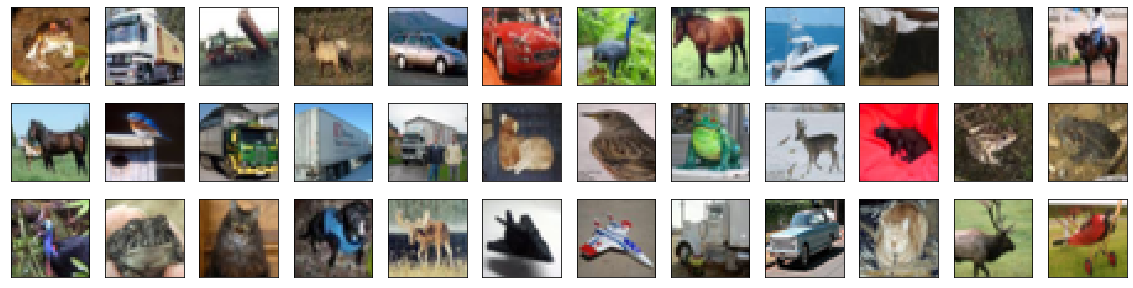

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [35]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [34]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')
print(y_train.shape)
# print(y_train[0][:3])

x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 test samples
5000 validation samples
(40000, 10, 2)


### 5. Define the Model Architecture 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Flatten, Dense, Dropout


model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

### 6. Compile the Model 

In [17]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 7. Train the Model 

In [18]:
# from keras.callbacks import ModelCheckpoint   

# train the model
# checkpointer = ModelCheckpoint(filepath='modelWeights.hdf5', verbose=1, 
#                                save_best_only=True)
%time model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_valid, y_valid),verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 270s 6ms/sample - loss: 1.5467 - accuracy: 0.4394 - val_loss: 1.2911 - val_accuracy: 0.5348
Epoch 2/100
45000/45000 [==============================] - 263s 6ms/sample - loss: 1.1495 - accuracy: 0.5968 - val_loss: 1.0627 - val_accuracy: 0.6198
Epoch 3/100
45000/45000 [==============================] - 268s 6ms/sample - loss: 1.0317 - accuracy: 0.6408 - val_loss: 0.9704 - val_accuracy: 0.6706oss: 1.0316 - accuracy: 0.
Epoch 4/100
45000/45000 [==============================] - 281s 6ms/sample - loss: 0.9862 - accuracy: 0.6631 - val_loss: 1.1162 - val_accuracy: 0.6314
Epoch 5/100
45000/45000 [==============================] - 284s 6ms/sample - loss: 0.9622 - accuracy: 0.6756 - val_loss: 1.0573 - val_accuracy: 0.6440
Epoch 6/100
45000/45000 [==============================] - 284s 6ms/sample - loss: 0.9721 - accuracy: 0.6736 - val_loss: 0.9777 - val_accuracy: 0.6722
Epoch 7/100
45000/4

45000/45000 [==============================] - 222s 5ms/sample - loss: 2.3154 - accuracy: 0.1071 - val_loss: 2.2996 - val_accuracy: 0.0984
Epoch 55/100
45000/45000 [==============================] - 220s 5ms/sample - loss: 2.3205 - accuracy: 0.1066 - val_loss: 2.3020 - val_accuracy: 0.0986
Epoch 56/100
45000/45000 [==============================] - 228s 5ms/sample - loss: 2.3268 - accuracy: 0.1070 - val_loss: 2.5343 - val_accuracy: 0.1626
Epoch 57/100
45000/45000 [==============================] - 220s 5ms/sample - loss: 2.4717 - accuracy: 0.1125 - val_loss: 2.2846 - val_accuracy: 0.1082
Epoch 58/100
45000/45000 [==============================] - 213s 5ms/sample - loss: 2.3228 - accuracy: 0.1050 - val_loss: 2.3587 - val_accuracy: 0.1470
Epoch 59/100
45000/45000 [==============================] - 235s 5ms/sample - loss: 2.3259 - accuracy: 0.1062 - val_loss: 2.2975 - val_accuracy: 0.1002
Epoch 60/100
45000/45000 [==============================] - 218s 5ms/sample - loss: 2.3270 - accuracy

### It took ( 423) mins that is 7 hours and 3 minutes in i3 and 4GB RAM laptop! 

### 8. Load the Model with the Best Validation Accuracy

In [19]:
model.save('modelWeights.h5')

In [20]:
# load the weights that yielded the best validation accuracy
# model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [21]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.1


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [22]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

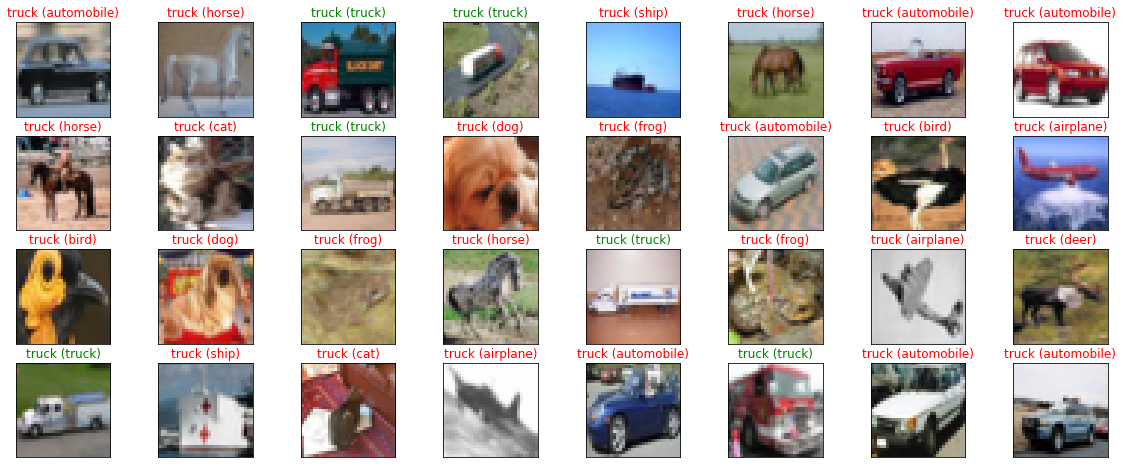

In [23]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))